In [22]:
from speedup import generate_out_images, solve_inverse
import numpy as np
import imageio
import matplotlib.pyplot as plt
import os

In [10]:
dim = 512
m = 3

In [11]:
def create_frame(frame_x_pixel_len, frame_y_pixel_len, frame_x_pixel_coor, frame_y_pixel_coor, thickness, intensity):
  fo = np.zeros((512, 512), np.double)
  for i in range(512):
    for j in range(512):
      if ((i >= frame_y_pixel_coor and i < frame_y_pixel_coor + frame_y_pixel_len and j >= frame_x_pixel_coor and j < frame_x_pixel_coor + thickness)
      or (i >= frame_y_pixel_coor and i < frame_y_pixel_coor + thickness and j >= frame_x_pixel_coor and j < frame_x_pixel_coor + frame_x_pixel_len)
      or (i >= frame_y_pixel_coor and i < frame_y_pixel_coor + frame_y_pixel_len and j >= frame_x_pixel_coor + frame_x_pixel_len - thickness and j < frame_x_pixel_coor + frame_x_pixel_len)
      or (i >= frame_y_pixel_coor + frame_y_pixel_len - thickness and i < frame_y_pixel_coor + frame_y_pixel_len and j >= frame_x_pixel_coor and j < frame_x_pixel_coor + frame_x_pixel_len)):
        fo[i, j] = intensity
      else:
        fo[i, j] = 0
  return fo

In [14]:
src1 = create_frame(200, 200, 40, 40, 20, 1)
src2 = create_frame(300, 300, 100, 100, 20, 1)
src3 = create_frame(200, 200, 300, 250, 20, 1)

src = np.zeros((dim, dim, m), np.double)
src[:, :, 0] = src1[:, :]
src[:, :, 1] = src2[:, :]
src[:, :, 2] = src3[:, :]
src = src / np.amax(src)

generated_images = generate_out_images(dim, m, 0.1, src)
out = generated_images[0]

## Изображение

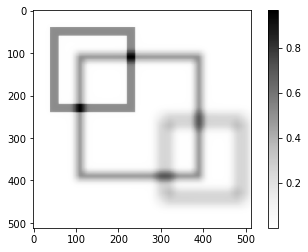

In [15]:
plt.imshow(out[:, :, 0], cmap="Greys", interpolation='nearest')
plt.colorbar()

## Востановленный

In [19]:
result = solve_inverse(out, dim, m, 0.1, 0.001, 10)
result = result / np.max(result)

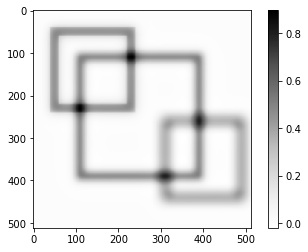

In [20]:
plt.imshow(result[0:512,0:512,0], cmap="Greys", interpolation='nearest')
plt.colorbar()

In [23]:
src1 = imageio.imread(os.getcwd() + '/source/src_1.png')
src2 = imageio.imread(os.getcwd() + '/source/src_2.png')
src3 = imageio.imread(os.getcwd() + '/source/src_3.png')

src = np.zeros((dim, dim, m), np.double)
src[:, :, 0] = src1[:, :, 0]
src[:, :, 1] = src2[:, :, 0]
src[:, :, 2] = src3[:, :, 0]
src = src / np.amax(src)

generated_images = generate_out_images(dim, m, 0.1, src)
out = generated_images[0]

## Изображение

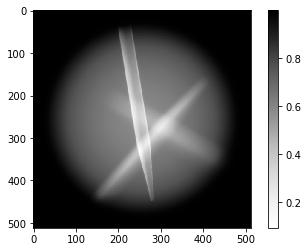

In [25]:
plt.imshow(np.ones((512, 512)) - out[0:512,0:512,0], cmap="Greys", interpolation='nearest')
plt.colorbar()

## Востановленный

In [24]:
result = solve_inverse(out, 512, 3, 0.1, 0.001, 10)
result = result / np.max(result)

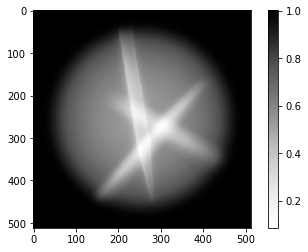

In [27]:
plt.imshow(np.ones((512, 512)) - result[0:512,0:512,0], cmap="Greys", interpolation='nearest')
plt.colorbar()